# Lithuania 2019 election prediction

In 2019 there will be 3 elections in Lithuania (small country in Europe):

* 3 March of 2019 elections to the Municipal Councils,
* 12 May of 2019  Presidential elections,
* 26 May of 2019 elections to the European Parliament.

This notebook aims to analyze historical election data and try to predict best strategy for 2019 elections.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

Let's first compared Lithuania in the context of EU member states.

In [30]:
df_EU_members = pd.read_csv("EU_member_info.csv")
df_EU_members.head()

,Country_name,Establish_year,Join_EU,Join_Schengen,Join_Euro,Population_1990
0,Austria,1955,1995,1997.0,1999.0,"7,707"
1,Belgium,1919,1958,1995.0,1999.0,"9,978"
2,Bulgaria,1989,2007,NaN,NaN,"8,821"
3,Croatia,1991,2013,NaN,NaN,"4,776"
4,Cyprus,1960,2004,NaN,2008.0,767


Let's add new column, which categorizes countries by the time they joined EU: (i) founders, (ii) cold war era or (iii) post soviet collapse.

In [31]:
def join_period(year):
    """
    Input:
        year: integer, year country joined EU
    Output:
        period: string, period at which country joined EU
    """
    if year == 1958:
        return "Founders"
    elif year < 1990:
        return "Cold War"
    else:
        return "Post USSR collapse"
        
df_EU_members["Join Period"] = df_EU_members['Join_EU'].apply(join_period)
df_EU_members.head()

,Country_name,Establish_year,Join_EU,Join_Schengen,Join_Euro,Population_1990,Join Period
0,Austria,1955,1995,1997.0,1999.0,"7,707",Post USSR collapse
1,Belgium,1919,1958,1995.0,1999.0,"9,978",Founders
2,Bulgaria,1989,2007,NaN,NaN,"8,821",Post USSR collapse
3,Croatia,1991,2013,NaN,NaN,"4,776",Post USSR collapse
4,Cyprus,1960,2004,NaN,2008.0,767,Post USSR collapse


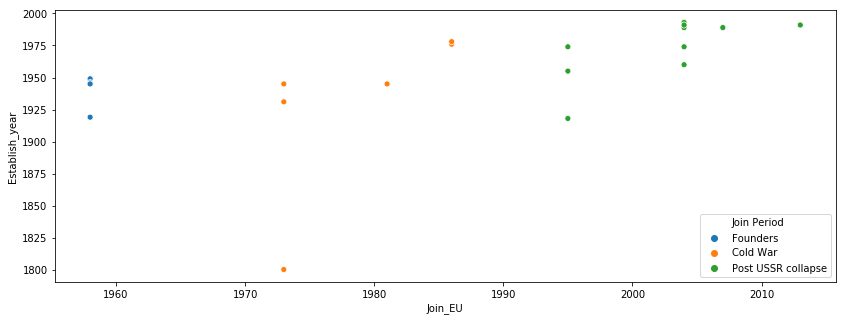

In [32]:
fig, ax = plt.subplots(figsize=(14, 5)) 
ax = sns.scatterplot(x="Join_EU", y="Establish_year", hue="Join Period", data=df_EU_members,
                     y_jitter=.2, hue_order=["Founders", "Cold War", "Post USSR collapse"]);

ax.legend(loc=4);

In [33]:
df_EU_members[df_EU_members.Establish_year <1900]

,Country_name,Establish_year,Join_EU,Join_Schengen,Join_Euro,Population_1990,Join Period
27,United Kingdom,1800,1973,NaN,NaN,"57,110",Cold War


There is an outlier with Democracy year 1800. Not suprisingly it is United Kingdom.

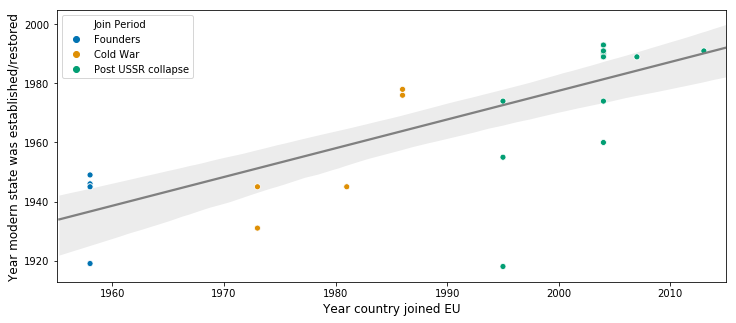

In [44]:
fig, ax = plt.subplots(figsize=(12, 5)) 

# make regplot tickers very small
ax = sns.regplot(x="Join_EU", y="Establish_year", scatter_kws={'s':0.2}, color='#808080',
                 data=df_EU_members[df_EU_members.Establish_year>1900])
ax = sns.scatterplot(x="Join_EU", y="Establish_year", hue="Join Period", palette="colorblind",
                     data=df_EU_members[df_EU_members.Establish_year>1900],
                     hue_order=["Founders", "Cold War", "Post USSR collapse"]);

ax.set_ylabel("Year modern state was established/restored", fontsize=12)
ax.set_xlabel("Year country joined EU", fontsize=12)
ax.set_xlim(1955,2015);
fig.savefig("fig_1_eu_members.svg", dpi=300, format='svg')

In [38]:
# Calculate pearson correlation coefficient
np.corrcoef(df_EU_members[df_EU_members.Establish_year>1900]['Establish_year'].values,
           df_EU_members[df_EU_members.Establish_year>1900]['Join_EU'].values)[0][1]

0.773563887011156

In [54]:
young_states = df_EU_members[df_EU_members.Establish_year>=1990].shape[0]
print(young_states/df_EU_members.shape[0])

0.25


In [55]:
df_EU_members[df_EU_members.Establish_year>=1990]

,Country_name,Establish_year,Join_EU,Join_Schengen,Join_Euro,Population_1990,Join Period
3,Croatia,1991,2013,NaN,NaN,"4,776",Post USSR collapse
5,Czech Republic,1993,2004,2007.0,NaN,"10,324",Post USSR collapse
7,Estonia,1991,2004,2007.0,2011.0,"1,565",Post USSR collapse
15,Latvia,1990,2004,2007.0,2014.0,"2,664",Post USSR collapse
16,Lithuania,1990,2004,2007.0,2015.0,"3,697",Post USSR collapse
23,Slovakia,1993,2004,2007.0,2009.0,"5,278",Post USSR collapse
24,Slovenia,1991,2004,2007.0,2007.0,"2,007",Post USSR collapse
